<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/Tugas_akhir_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Pelanggan Kartu Kredit
Nama : 

Tito Rhenaldi Priono (175150400111052)

Priska Aprillia Putri (175150401111006)

Ammar yazid taqiyuddin (175150407111044)

Muhamad Lukman Nurhakim (175150407111041)


## Deskripsi Tujuan Bisnis :
<br>
Layanan kartu kredit saat ini semakin ditinggalkan, dan seorang manajer dari perusahaan merasa terganggu dengan semakin banyaknya pelanggan yang meninggalkan layanan kartu kredit mereka. Oleh karena itu mereka membutuhkan model data sains yang dapat digunakan untuk memprediksi siapa saja pelanggan yang berpotensi berhenti menggunakan layanan kartu kredit. Dengan adanya model tersebut, diharapkan pihak bank dapat secara proaktif memberikan pelayanan yang lebih baik kepada pelanggan, yang tujuannya untuk dapat mengubah keputusannya untuk tidak meninggalkan penggunaan kartu kredit.


## Analisa Pendekatan yang akan dilakukan :
<br>
Akan mengumpulkan data seperti nomor pelanggan ,aktivitas pelanggan, nomor pelanggan, jenis kelamin, jumlah tanggungan, kualitas pendidikan, status,pendapatan tahunan, card kategori seperti (blue, silver, gold), dan jangka waktu berhubungan dengan bank kemudian melakukan analisis data untuk mencari tau alasan di balik permasalahan ini dan akan memanfaatkan data untuk memprediksi pelanggan yang cenderung berhenti.

## Pengumpulan data :

<br>

Untuk melakukan penghitungan persentase yang berhenti menggunakan layanan kartu kredit diperlukan kumpulan data yang berhubungan dengan pelanggan untuk melakukan prediksi persentase. Seorang data analis yang diminta untuk melakukan pemodelan data kemudian melakukan pengumpulan data dan kemudian membuat sebuah dataset dengan 21 kolom data.

<br>

Pemahaman terhadap data yang dikumpulkan :

<br>

Berikut link Dataset: https://drive.google.com/drive/folders/1b5ProyU3sSfINCa_o52-D_O0vjOaFn4a?usp=sharing

<br>

Data yang dikumpulkan merupakan data profil dan data terkait layanan kartu kredit. Berikut adalah data yang dikumpulkan :
<br>

Data profil pelanggan :
1. ClientNum : id pelanggan yang bersifat unik
2. Attrition_Flag : status pelanggan (pelanggan/ sudah keluar)
3. Customer_Age : data tentang umur pelanggan
4. Gender : data tentang jenis kelamin pelanggan
5. Dependent_count : tingkatan ketergantungan terhadap sumber pendapatan utama.
6. Education_level : jenjang edukasi yang telah ditempuh
7. Marital_status : data tentang status menikah
8. Income_category : data tentang jumlah penghasilan pelanggan

Data layanan kartu kredit :
1. Card_category : tipe kategori kartu yang dimiliki pelanggan
2. Months_on_book : durasi pelanggan menggunakan jasa kartu kredit
3. Total_relationship_count : jumlah produk/jasa yang digunakan pelanggan
4. Months_Inactive_12_mon : berapa lama masa tidak aktif dalam durasi 12 bulan
5. Contacts_Count_12_mon : berapa banyak kontak dalam durasi 12 bulan
6. Credit_Limit : limit kredit dalam kartu kredit
7. Total_Revolving_Bal : jumlah pinjaman pada kartu kredit
8. Avg_Open_To_Buy : Rata - rata pembelian linoe of credit (LOC)
9. Total_Amt_Chng_Q4_Q1 : perubahan jumlah transaksi setiap musim (3 bulan)
10. Total_Trans_Amt : jumlah total uang yang ditransaksi dalam waktu 12 bulan
11. Total_Trans_Ct : jumlah total pelanggan melakukan transaksi dalam waktu 12 bulan
12. Total_Ct_Chng_Q4_Q1 : perubahan aktivitas transaksi setiap musim (3 bulan)
13. Avg_Utilization_Ratio : Rasio Penggunaan Kartu Rata-rata



## Import Dataset
Pada langkah ini, kami menggunakan utility dari colab untuk mengimport file .csv, hal ini dilakukan untuk memudahkan mengakses file tanpa harus memasukkan path yang spesifik. Sehingga siapapun dapat menggunakan notebook ini.  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


## Import Utilities dan Library
Mengimport beberapa utilities dan library yang akan digunakan untuk menghitung prediksi, membuat grafik, dan membuat dataframe.

In [ ]:
import io
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import statsmodels.api as sm

## Dataframe
Pada kode dibawah dataset yang sudah berhasil di import akan dimasukkan kedalam dataframe dan ditunjukkan isi dataset tersebut. Disini kami membuat 2 dataframe, df untuk eksplorasi data dan model untuk pemodelan data.

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['BankChurners.csv']))
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
model = pd.read_csv(io.BytesIO(uploaded['BankChurners.csv']))
model

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## Persiapan Data
Pada tahap ini, kami melakukan proses persiapan data dengan melakukan data cleaning. Untuk menjaga konsistensi kedua dataframe kami lakukan cleaning dengan metode yang sama.

### Persiapan Dataframe "df"

Pada dataframe "df" kami menghapus kolom :
1. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
2. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3. CLIENTNUM

ketiga kolom tersebut kami hapus karena tidak dipakai pada proses selanjutnya.





In [ ]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                'CLIENTNUM'],axis=1,inplace=True)

In [ ]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


Setelah mengahpus kolom yang tidak dipakai, selanjutnya adalah memeriksa jika terdapat value yang kosong pada setiap field. 

In [ ]:
df.isnull().sum()/df.shape[0]*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

Tidak ada value yang kosong pada dataframe tersebut. Selanjutnya kami juga memeriksa tipe data untuk memudahkan dalam proses kedepannya.

In [ ]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Setelah itu, kami juga memeriksa jika sebuah field memiliki outlier atau nilai yang berbeda jauh dengan nilai yang lain.

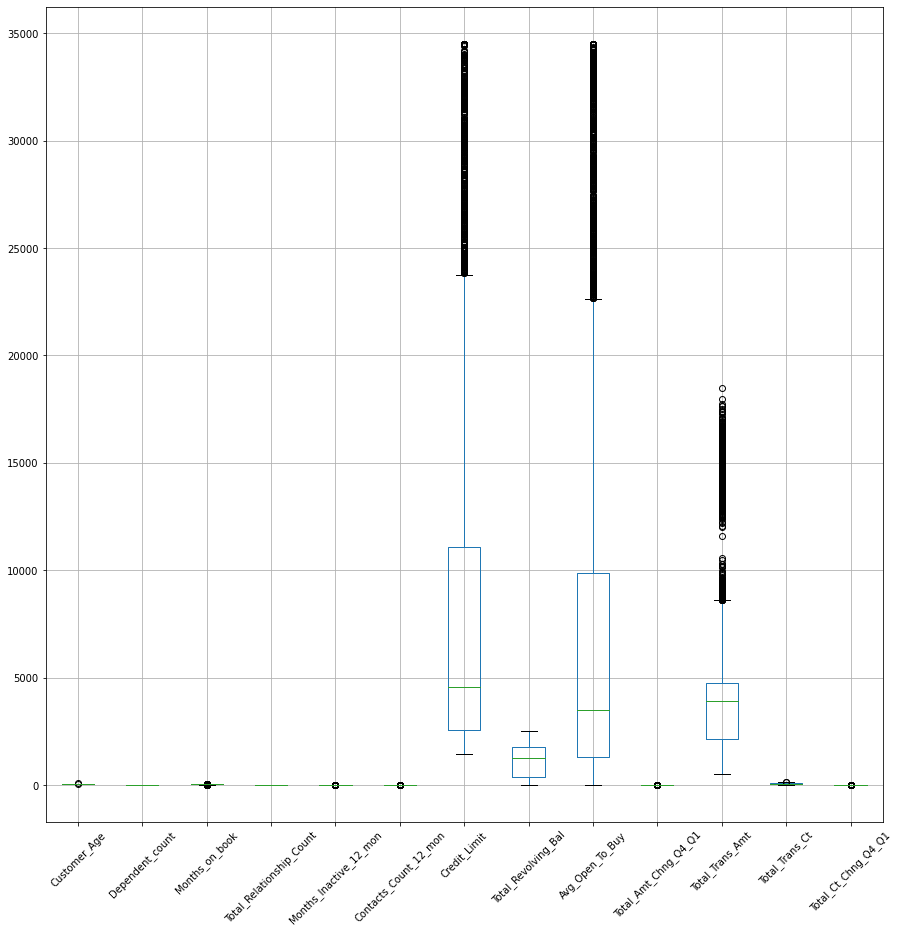

In [ ]:
plt.figure(figsize=(15,15))

df.boxplot(column=['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                   'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit', 'Total_Revolving_Bal',
                   'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])
plt.xticks(rotation=45)
plt.show()

Tidak terdapat outlier pada dataframe tersebut, sehingga dapat dilakukan eksplorasi data.

### Persiapan DataFrame "model"
Pada dataframe "model" kami menghapus kolom yang sama seperti pada datafram "df", yaitu:
 1. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

    2. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

   3. CLIENTNUM

ketiga kolom tersebut kami hapus karena tidak dipakai pada proses selanjutnya.

In [ ]:
model.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                'CLIENTNUM'],axis=1,inplace=True)
model.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Selanjutnya adalah mengubah value teks atau huruf menjadi angka atau numerik. Namun sebelum itu, kami ingin memeriksa value yang unik pada semua field untuk dijadikan angka.

In [ ]:
print(model['Attrition_Flag'].value_counts())
print(model['Gender'].value_counts())
print(model['Education_Level'].value_counts())
print(model['Marital_Status'].value_counts())
print(model['Income_Category'].value_counts())
print(model['Card_Category'].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [ ]:
model['Attrition_Flag'].replace({'Existing Customer' : 0, 'Attrited Customer' : 1},inplace = True)
model['Gender'].replace({'F': 0, 'M': 1}, inplace = True)
model['Education_Level'].replace({'Unknown' : 0, 'Uneducated' : 1, 'High School' : 2, 'College' : 3, 
                               'Graduate' : 4, 'Post-Graduate' : 5, 'Doctorate' : 6}, inplace = True)
model['Marital_Status'].replace({'Unknown' : 0, 'Single' : 1, 'Divorced' : 2, 'Married' : 3}, inplace = True)
model['Income_Category'].replace({'Unknown' : 0, 'Less than $40K' : 1, '$40K - $60K' : 2, '$60K - $80K' : 3,
                              '$80K - $120K' : 4, '$120K +' : 5}, inplace = True)
model['Card_Category'].replace({'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}, inplace = True)
model.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Berikut adalah hasil setelah melakukan transformasi data

In [ ]:
model.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,2,3,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,4,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,4,3,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


## Eksplorasi Data
Pada tahap ini, kami menampilkan data dalam bentuk grafik untuk dapat menganalisa dataset.

([<matplotlib.patches.Wedge at 0x7f2806928390>,
 [Text(-0.10035590564411713, 1.0954125671190509, 'M'),
  Text(0.10035590564411676, -1.095412567119051, 'F')],
 [Text(-0.054739584896791156, 0.5974977638831186, '52.91%'),
  Text(0.05473958489679095, -0.5974977638831187, '47.09%')])

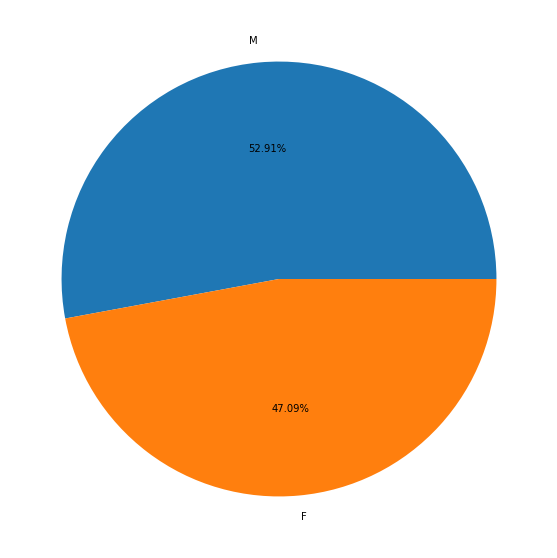

In [ ]:
pie = pd.value_counts(df["Gender"]).tolist()
plt.figure(figsize = (10,10))
plt.pie(x = pie, labels = ["M", "F"], autopct='%.2f%%')

Pada pie chart diatas, pemilik kartu kredit hampir terbagi rata antara wanita dan pria.

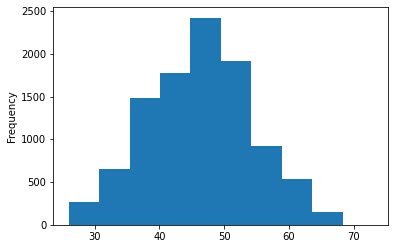

In [ ]:
df['Customer_Age'].plot(kind='hist')

Pada histogram diatas, kebanyakan pemilik kartu kredit berada pada umur 35 sampai dengan 55 tahun.

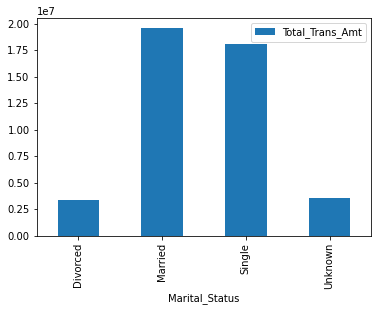

In [ ]:
df.groupby('Marital_Status').agg({'Total_Trans_Amt':'sum'}).plot(kind='bar')

Pada grafik diatas, mayoritas pemiliki kartu kredit adalah orang yang sudah menikah dan orang yang masih lajang. Mereka pun yang paling berkontribusi dalam total transaksi kartu kredit.

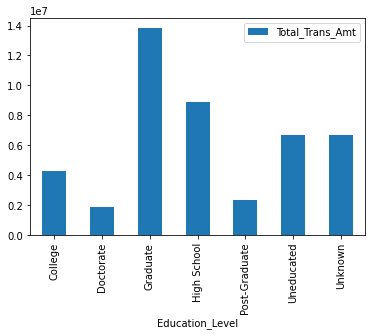

In [ ]:
df.groupby('Education_Level').agg({'Total_Trans_Amt':'sum'}).plot(kind='bar')

pada grafik diatas, dapat dilihat bahwa ada inkonsistensi antar tingkat edukasi dengan jumlah transaksi yang dilakukan. maka tingkat edukasi seseorang tidak memengaruhi total transaksi kartu kredit. 

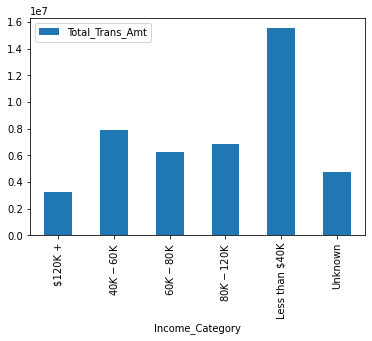

In [ ]:
df.groupby('Income_Category').agg({'Total_Trans_Amt':'sum'}).plot(kind='bar')

Pada grafik diatas, terdapat juga inkosistensi antar kategori pemasukan. 

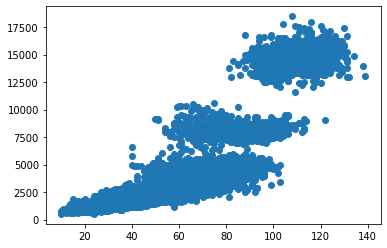

In [ ]:
plt.scatter(x=df['Total_Trans_Ct'],y=df['Total_Trans_Amt'])

Grafik diatas menunjukkan jumlah seseorang melakukan transaksi dengan jumlah uang yang ditransaksikan

## Pemodelan Data
Pada tahap berikut, kami akan memodelkan data menggunakan metode Random Forest Classifier.

In [ ]:
model.corr()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,0.018203,-0.037272,0.018991,0.008796,-0.024117,-0.013577,0.002354,0.013687,-0.150005,0.152449,0.204491,-0.023873,-0.263053,-0.000285,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410
Customer_Age,0.018203,1.000000,-0.017312,-0.122254,-0.002369,0.040298,0.023508,-0.018235,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Gender,-0.037272,-0.017312,1.000000,0.004563,-0.005087,0.006491,0.786608,0.080093,-0.006728,0.003157,-0.011163,0.039987,0.420806,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851
Dependent_count,0.018991,-0.122254,0.004563,1.000000,0.000472,0.004839,0.066278,0.030469,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Education_Level,0.008796,-0.002369,-0.005087,0.000472,1.000000,0.015478,-0.011677,0.014989,0.006613,0.000766,0.005761,-0.006280,-0.002354,-0.006800,-0.001743,-0.010040,-0.007460,-0.004307,-0.016692,-0.001849
Marital_Status,-0.024117,0.040298,0.006491,0.004839,0.015478,1.000000,0.017770,-0.052296,0.030598,0.020427,-0.004915,0.001780,-0.053580,0.036352,-0.056828,0.050805,-0.062698,-0.116268,0.008999,0.046623
Income_Category,-0.013577,0.023508,0.786608,0.066278,-0.011677,0.017770,1.000000,0.077326,0.022122,-0.003202,-0.016310,0.023113,0.475972,0.034718,0.472760,0.011352,0.019651,-0.054569,-0.012657,-0.246476
Card_Category,0.002354,-0.018235,0.080093,0.030469,0.014989,-0.052296,0.077326,1.000000,-0.012535,-0.094077,-0.014629,-0.000442,0.492446,0.026304,0.489985,0.007385,0.196003,0.134275,-0.007261,-0.198711
Months_on_book,0.013687,0.788912,-0.006728,-0.103062,0.006613,0.030598,0.022122,-0.012535,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.150005,-0.010931,0.003157,-0.039076,0.000766,0.020427,-0.003202,-0.094077,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663


Berdasarkan tabel korelasi diatas, akan digunakan beberapa field yang memiliki korelasi tinggi (> 0.15) dengan atribut 'Attrition_Flag'. Field yang akan digunakan adalah 'Total_Relationship_Count' 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'

In [ ]:
X = model[['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
        'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
        'Avg_Utilization_Ratio']]
y = model['Attrition_Flag']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

In [ ]:
clf=RandomForestClassifier(n_estimators=100, max_depth=13, random_state=3)

clf.fit(X,y)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

## Evaluasi Model

Berdasarkan model yang diatas, kami melakukan evaluasi terkait akurasi dari model tersebut.

In [ ]:
def find_model_accuracy(threshold,y_test,predictions):
    
    #Membuat kelas prediksi mengunggakan prediksi dengan nilai ambang
    predicted_classes = np.where(predictions>threshold, 1, 0)
    acc_score = accuracy_score(y_test, predicted_classes)
    print('***********************************************')
    print('   Accuracy Score of Model is '+str(acc_score))
    print('***********************************************')
    
    #Membuat Confusion Matrix dari test dan predicted results
    confusion_mat = confusion_matrix(y_test,predicted_classes)
    #Membuat dataframe Confusion Matrix
    confusion_df  = pd.DataFrame(confusion_mat,index=['Actual Neg', 'Actual Pos'],columns=['Predicted Neg','Predicted Pos'])
    print('             Model Results                     ')
    print('             *************                     ')
    #Menghitung akurasi True Positive dan False Positive 
    TN = confusion_mat[0][0]
    TP = confusion_mat[1][1]
    FN = confusion_mat[1][0]
    FP = confusion_mat[0][1]
    total = TN+TP+FN+FP
    acc = (TN + TP)/total
    missClassification = (FN+FP)/total
    nullErrorRate = (TN+FP)/total
    print('Accuray Of the Model '+ str(acc))
    print('Misclassification Rate '+str(missClassification))
    print('Null Error Rate '+ str(nullErrorRate))
    print('***********************************************')
    print('             Confusion Matrix                  ')
    print('             ----------------                  ')
    #Membuat sebuah map dengan sns
    sns.heatmap(data=confusion_df,cmap='coolwarm',annot=True)
    plt.show() 
    print('***********************************************')
    #Menunjukkan Classification Report
    print(classification_report(y_test, y_pred))

***********************************************
   Accuracy Score of Model is 0.9598552155314248
***********************************************
             Model Results                     
             *************                     
Accuray Of the Model 0.9598552155314248
Misclassification Rate 0.04014478446857519
Null Error Rate 0.8450148075024679
***********************************************
             Confusion Matrix                  
             ----------------                  


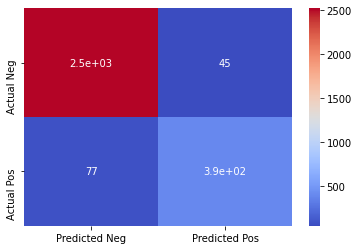

***********************************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2568
           1       0.90      0.84      0.87       471

    accuracy                           0.96      3039
   macro avg       0.93      0.91      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [ ]:
find_model_accuracy(0.75,y_test,y_pred)

Kesimpulan

<br>

berdasarkan model tersebut dapat dilihat bahwa masih terdapat 77 false - negative yang ingin kita hindari. selain itu, model ini juga memiliki akurasi yang tinggi dengan nilai 0,959 atau 0,96. 